In [1]:
# ----------------------------------------------------------------------------
#
# TITLE - 1D_radial_DF_transient_winding_spiral.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1501
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Look at the model DFs for transient winding spiral arm potentials
'''

__author__ = "James Lane"

In [3]:
## Imports

## Basic
import numpy as np
import sys, os, pdb, glob
import copy
import time
from tqdm import tqdm_notebook as tqdm_nb

## Plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import cm

## Astropy
from astropy import units as apu
from astropy.io import fits

## galpy
from galpy import orbit
from galpy import potential
from galpy import df
from galpy.actionAngle import actionAngleAdiabatic
from galpy.actionAngle import actionAngleStaeckel
from galpy.util import bovy_coords as gpcoords
from galpy.util import bovy_conversion as gpconv

## Scipy
from scipy.stats import binned_statistic_2d, binned_statistic
from scipy.optimize import curve_fit

## Add project-specific package. Assume relative location
sys.path.append('../../src/')
import ast1501.potential
import ast1501.util
import ast1501.fourier
import ast1501.linear_model

In [4]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Meta

## Future work

## Information
- Galpy notes on the DF: https://galpy.readthedocs.io/en/latest/diskdf.html
- Galpy notes on the actions: https://galpy.readthedocs.io/en/latest/actionAngle.html

# Prepare
Declare the keywords for the analysis, make the potential, and the DF

## Functions

In [5]:
# Define the sinusoid fitting function:
def sinusoid(x,A,om,phase,D):
    return A*np.cos(om*x + phase) + D
#def

## Keywords and File Names

In [6]:
spiral_filename = './data_N_ARMS_2_LIFETIME_0.12_T0_-0.86.npy'

In [7]:
phib_lims = [0, np.pi/2]
phib_bin_size = np.pi/60
lm = ast1501.linear_model.LinearModel2(instantiate_method=2,df_filename=spiral_filename,
    phib_lims=phib_lims, phib_bin_size=phib_bin_size,
    vT_prior_path='../../data/linear_model_prior/MWPotential2014_df_vT_data.npy')

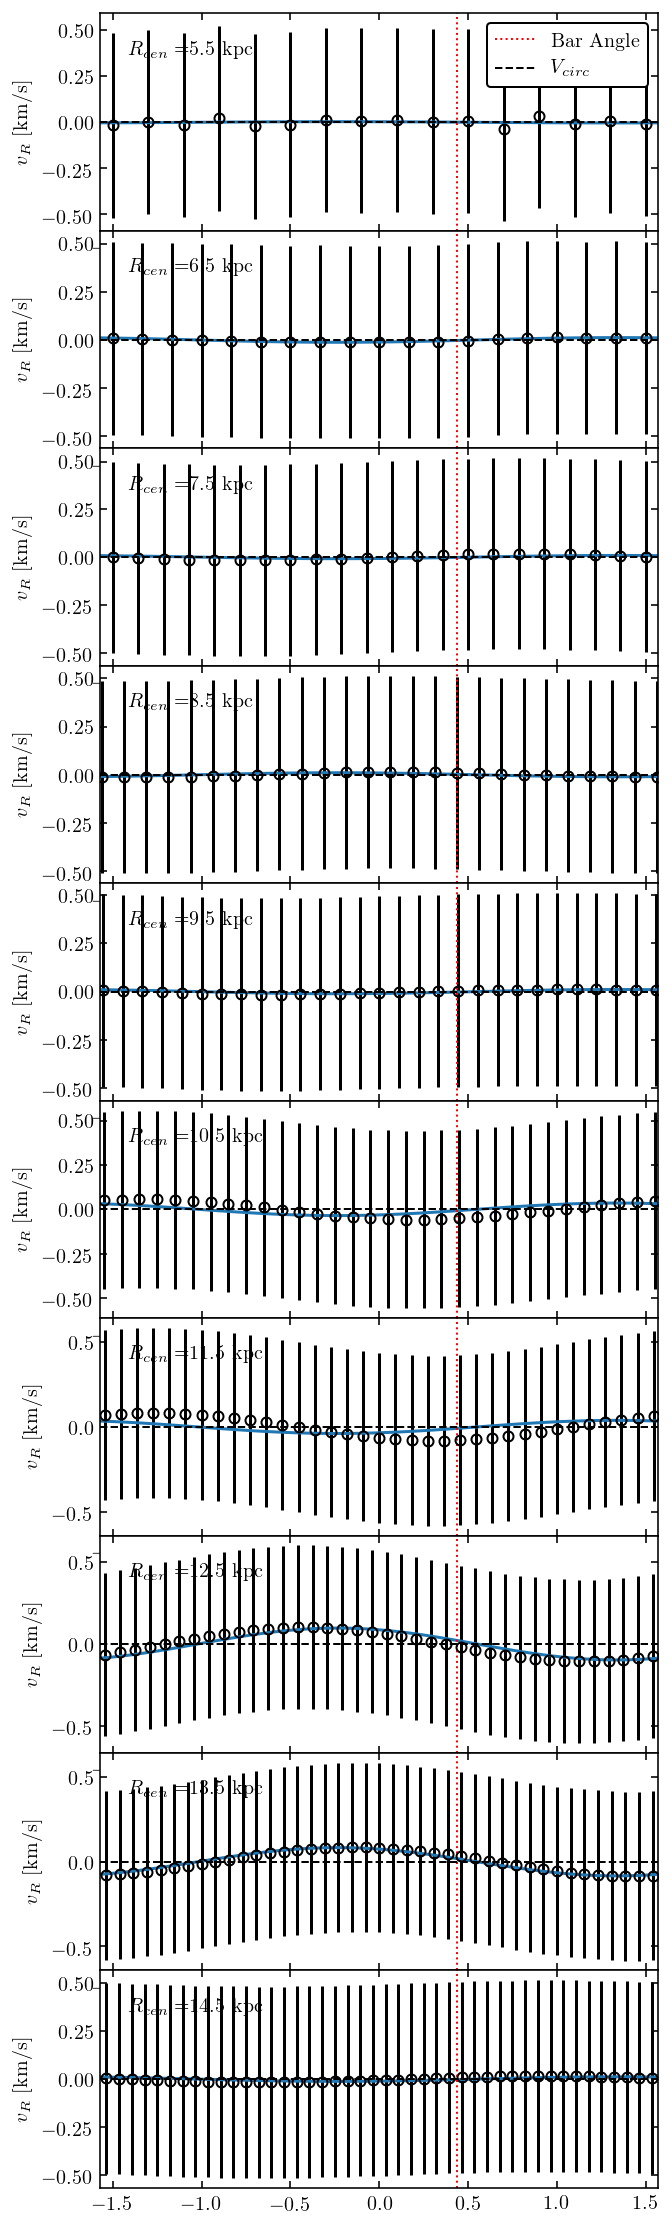

In [8]:
fig, axs = lm.plot_velocity_known_m_b_phi(velocity_type='vR')
fig.set_facecolor('White')

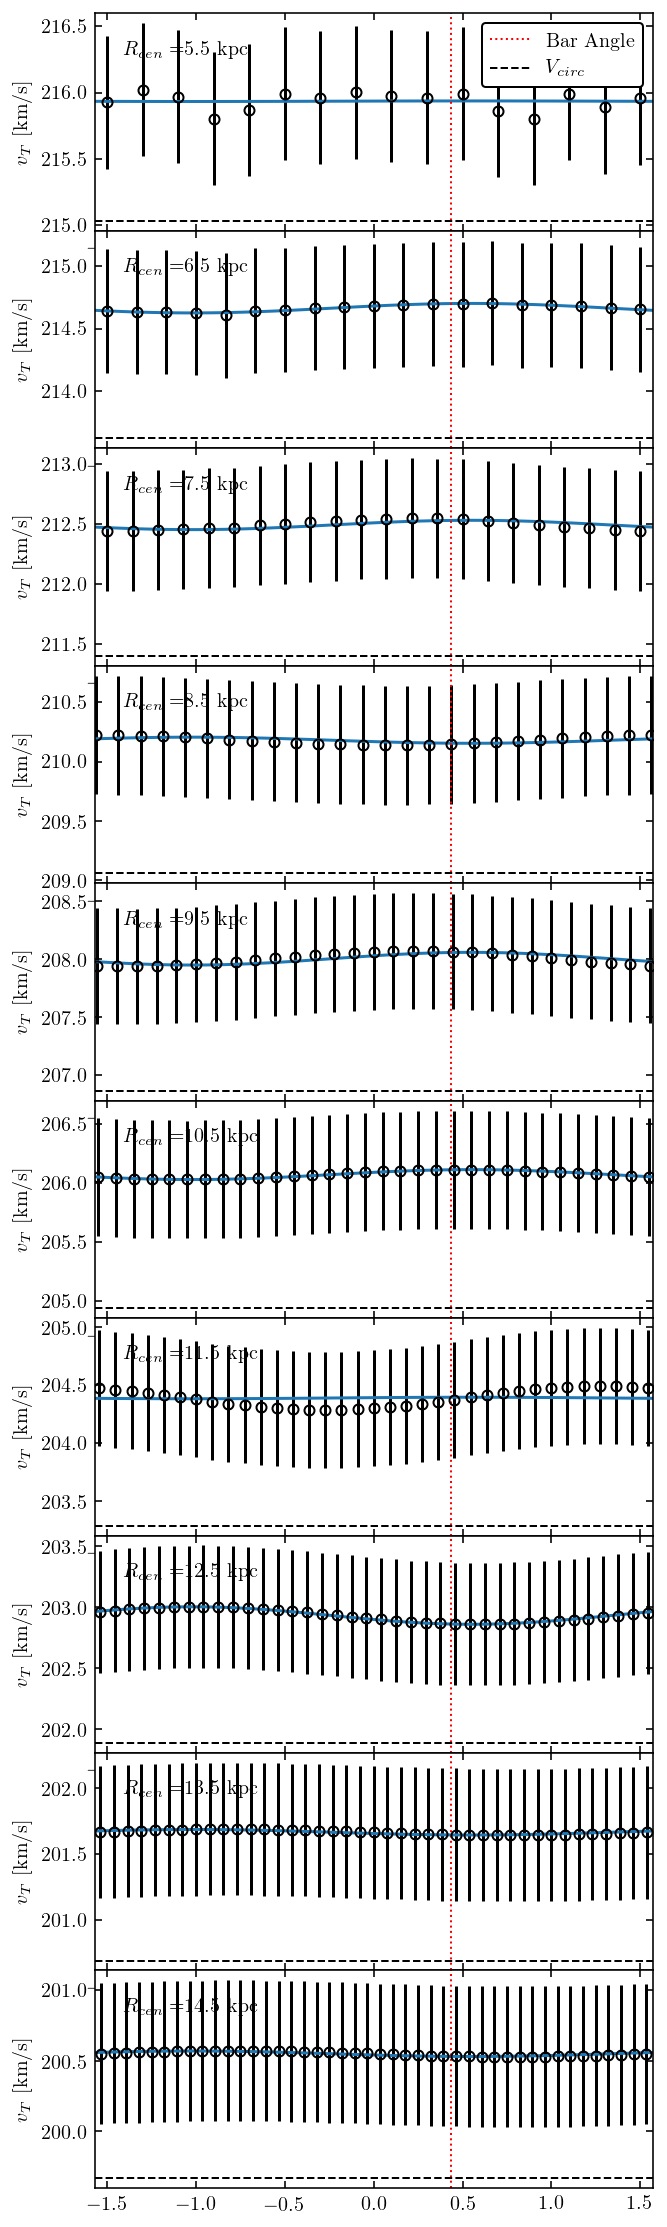

In [9]:
fig, axs = lm.plot_velocity_known_m_b_phi(velocity_type='vT')
fig.set_facecolor('White')